In [25]:
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set_style("darkgrid")
warnings.filterwarnings('ignore')

In [26]:
folder = ''
temp1 = pd.read_csv(folder+'Task1_step2.csv')
temp2 = pd.read_csv(folder+'Task2.csv')
temp3 = pd.read_csv(folder+'Task3.csv')

In [27]:
for key,value in temp1.iterrows():
    if value[1] == 0:
        temp = temp1.iloc[key, 8:17].to_list()
        temp1.iloc[key, 8:17] = [int(x) ^ 1 if x == 1.0 or x == 0.0 else np.nan for x in temp]

In [28]:
temp1.to_csv('Task1_step3.csv', index=False)
temp1.columns

Index(['participant_ID', 'treatment', 'part', 'trial_no', 'rounds',
       'red_prior_prob', 'true_guilty_suspect', 'suspect_accused', 'choice_1',
       'choice_2', 'choice_3', 'choice_4', 'choice_5', 'choice_6', 'choice_7',
       'choice_8', 'choice_9', 'outcome_1', 'outcome_2', 'outcome_3',
       'outcome_4', 'outcome_5', 'outcome_6', 'outcome_7', 'outcome_8',
       'outcome_9', 'timing_choice_1', 'timing_choice_2', 'timing_choice_3',
       'timing_choice_4', 'timing_choice_5', 'timing_choice_6',
       'timing_choice_7', 'timing_choice_8', 'timing_choice_9',
       'timing_choice_10', 'timing_choice_11', 'correct_suspect_accused',
       'evidence_round'],
      dtype='object')

In [29]:
total_no = len(temp1)
t1 = [0.1, 0.3, 0.5, 0.7, 0.9]
t2 = [0]* 5
t3 = [0]* 5
t4 = [0]* 5
t5 = [0]* 5
t6 = [0]* 5
t7 = [0]* 5
for key,value in temp1.iterrows():
    t2[t1.index(value[5])] += 1
    t3[t1.index(value[5])] += 1 if value[7] == 0 else 0
    
    t4[t1.index(value[5])] += 1 if value[4] == 1 else 0
    t5[t1.index(value[5])] += 1 if value[7] == 0 and value[4] == 1 else 0
    
    t6[t1.index(value[5])] += 1 if value[4] == 9 else 0
    t7[t1.index(value[5])] += 1 if value[7] == 0 and value[4] == 9 else 0

total = np.array(t3)/np.array(t2)
rounds1 = np.array(t5)/np.array(t4)
rounds9 = np.array(t7)/np.array(t6)

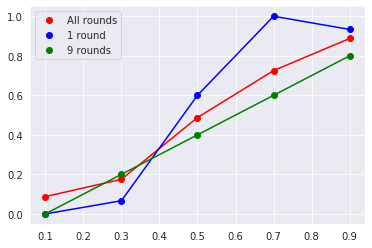

In [30]:
plt.plot(t1, total , 'ro', label='All rounds')
plt.plot(t1, total , 'r')
plt.plot(t1, rounds1 , 'bo', label='1 round')
plt.plot(t1, rounds1 , 'b')
plt.plot(t1, rounds9 , 'go', label='9 rounds')
plt.plot(t1, rounds9 , 'g')
plt.legend()
plt.show()